### **Iris Decision Tree**

**Name:** Jimenez Burriola Lesly Elizabeth

#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### **Read Dataset**

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

#### **Data Cleaning**

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

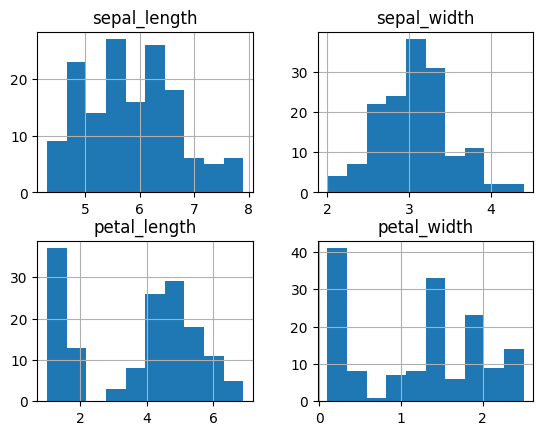

In [7]:
df.hist()

##### Search for missing values

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Search for duplicate values

In [9]:
df.duplicated().sum()

np.int64(3)

##### Remove duplicates

In [10]:
df.drop_duplicates(inplace=True)

##### Evaluating to identify outliers

<Figure size 1200x800 with 0 Axes>

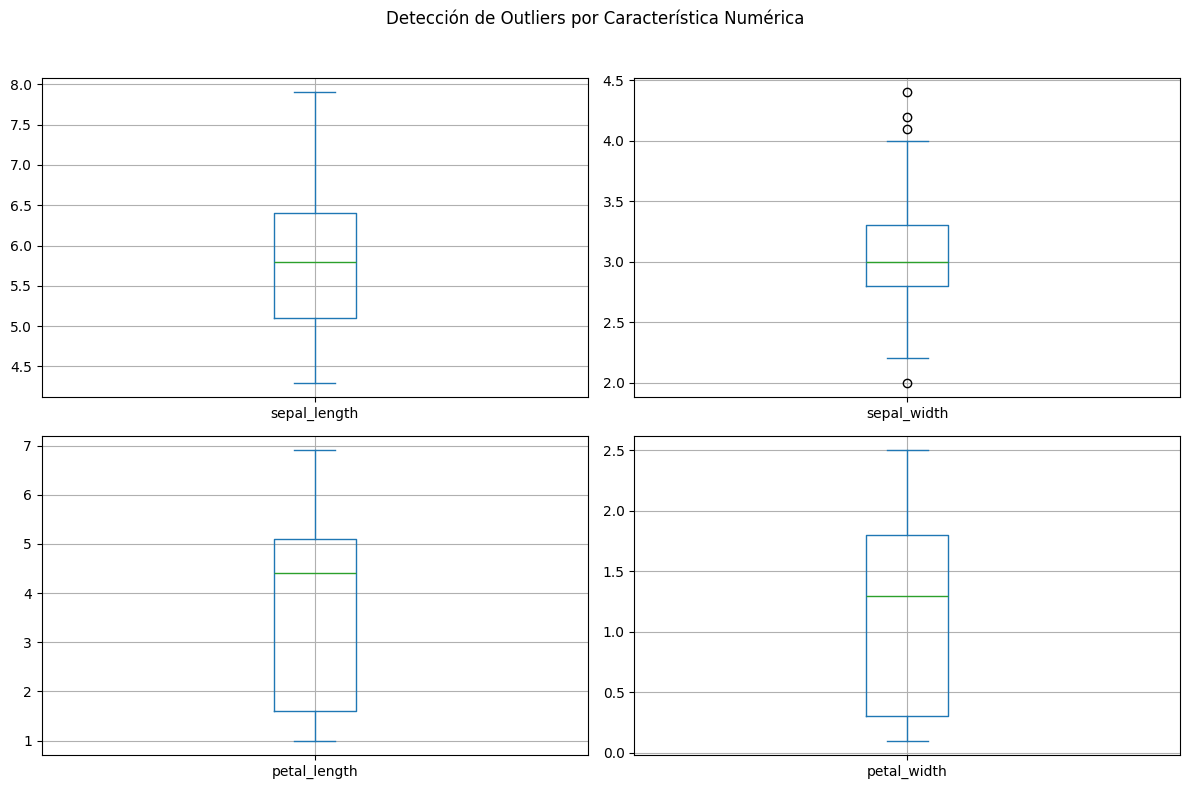

In [11]:
feature_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
plt.figure(figsize=(12, 8))
df[feature_columns].plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8), grid=True)
plt.suptitle('Detección de Outliers por Característica Numérica')
plt.tight_layout(rect=[0, 0, 1, 0.96])

##### Handling outliers in sepal_width

In [12]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

# límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# mantener solo las filas que no son outliers
df = df[(df['sepal_width'] >= limite_inferior) & (df['sepal_width'] <= limite_superior)]

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

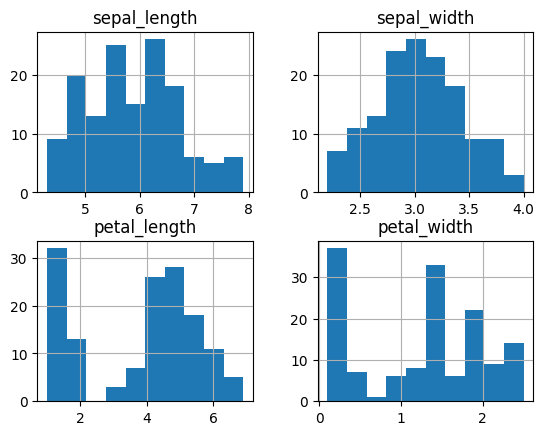

In [13]:
df.hist()

#### **Exploratory Data Analysis**

##### Statistical analysis

In [14]:
df.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  45.000000   49.000000  49.000000
             mean    4.980000    5.955102   6.604082
             std     0.346148    0.503348   0.632113
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.300000
             50%     5.000000    5.900000   6.500000
             75%     5.100000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  45.000000   49.000000  49.000000
             mean    3.377778    2.785714   2.979592
             std     0.330213    0.296507   0.323380
             min     2.300000    2.200000   2.200000
             25%     3.200000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.600000    3.000000   3.200000
             max     4.000000    3.400000   3.800000
petal_length count  45.000000   49.000000  49.000000
             mean    1.462222    4.275510   5.561224
             std     0.182519    0.461668   0.553706
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.400000   5.600000
             75%     1.600000    4.600000   5.900000
             max     1.900000    5.100000   6.900000
petal_width  count  45.000000   49.000000  49.000000
             mean    0.251111    1.332653   2.028571
             std     0.103621    0.194066   0.276887
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

##### Correlation heatmap

Text(0.5, 1.0, 'Iris Feature Correlation Heatmap')

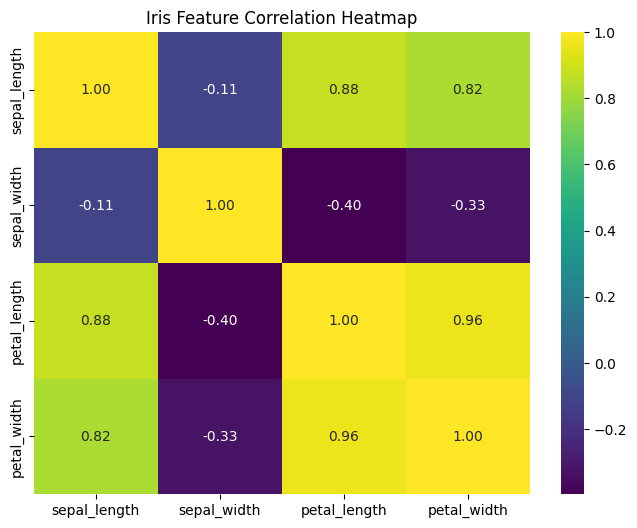

In [15]:
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Iris Feature Correlation Heatmap')

##### Box plot by species

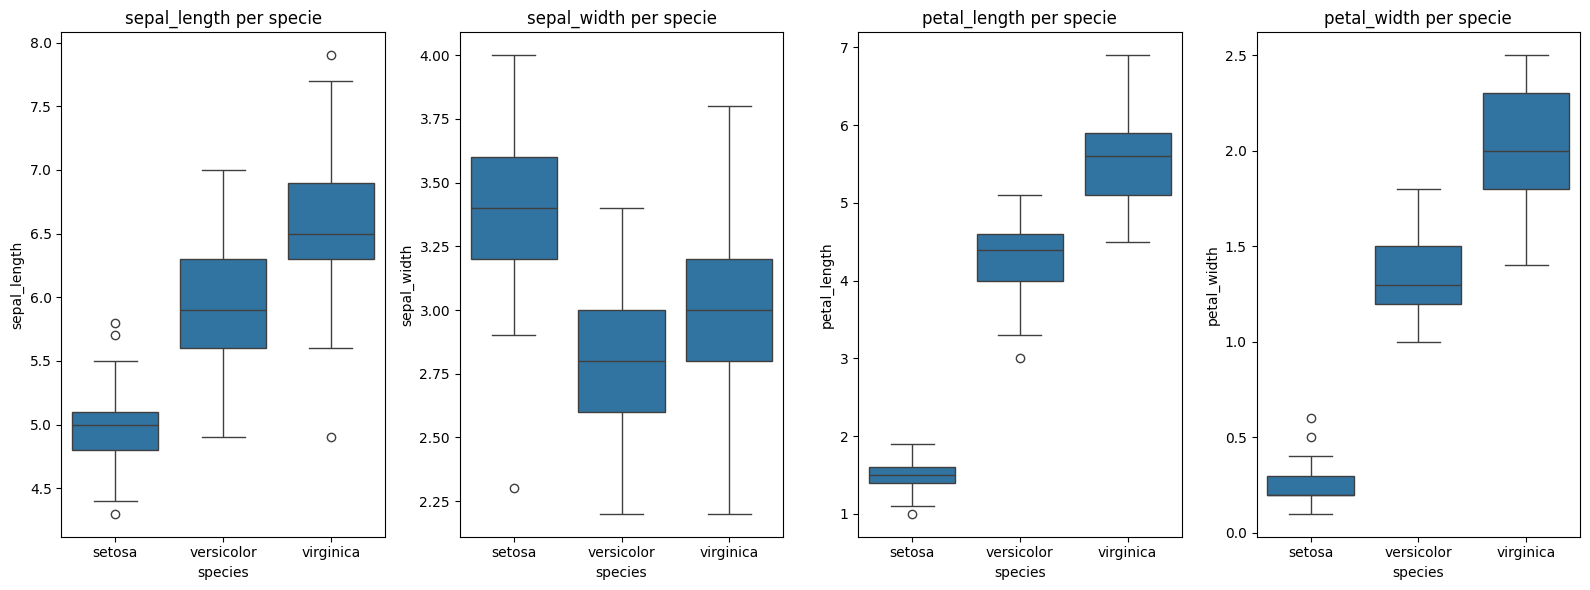

In [16]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'{col} per specie')
plt.tight_layout()

##### Scatter plot

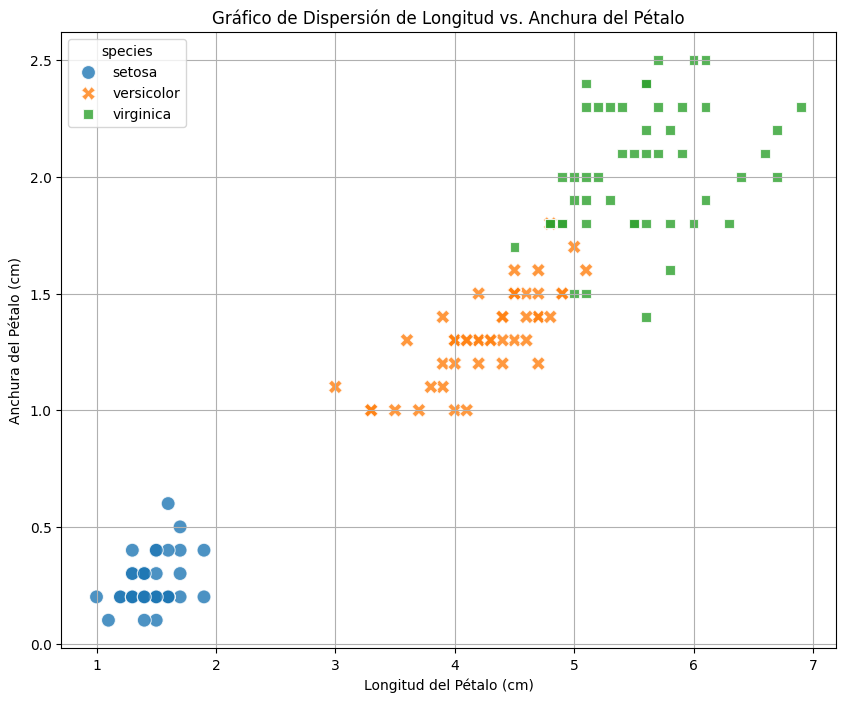

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', s=100, style='species', alpha=0.8)
plt.title('Scatter Plot of Petal Length vs. Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(True)

##### Histogram of each feature

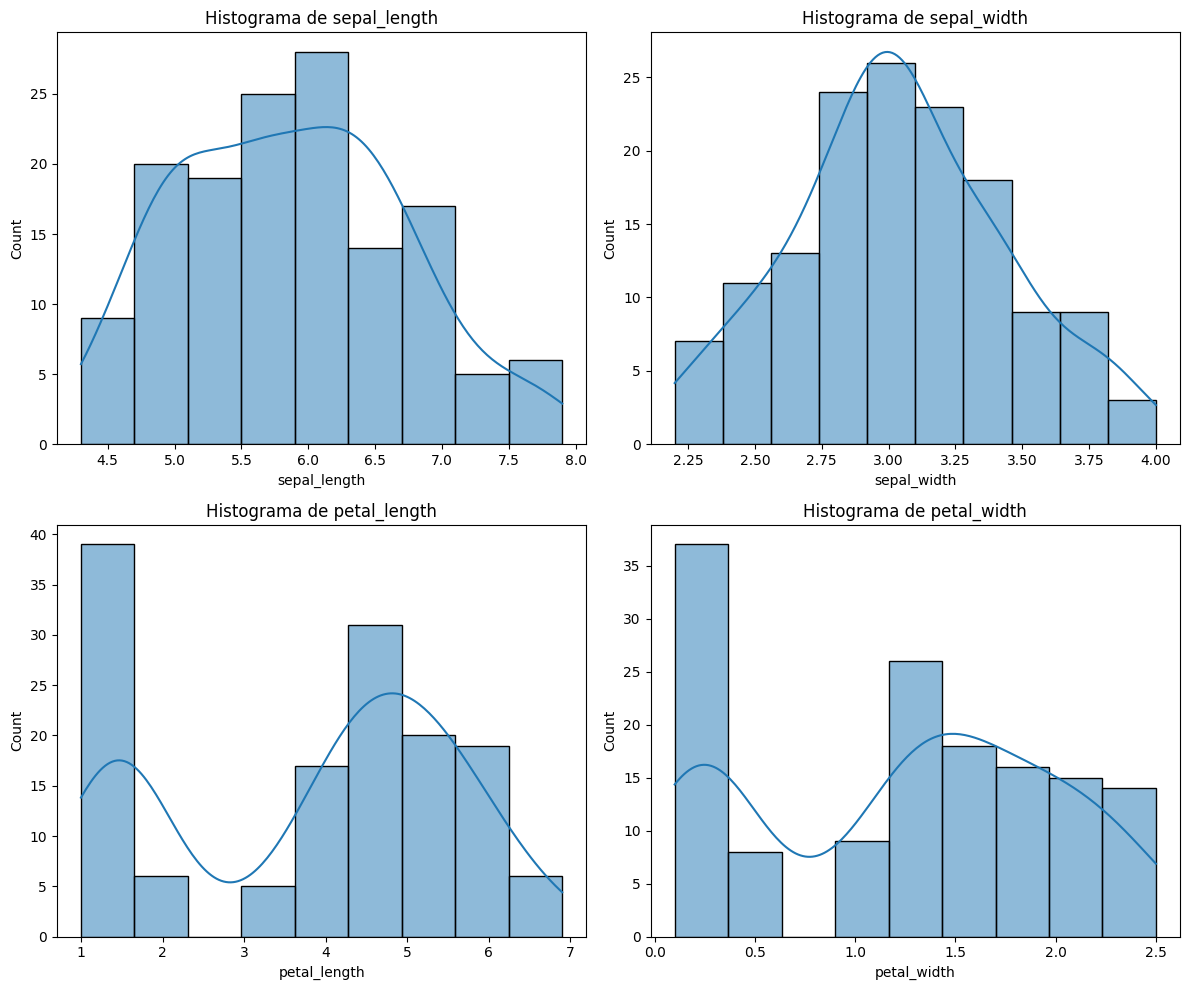

In [ ]:
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()

##### Violin chart by species

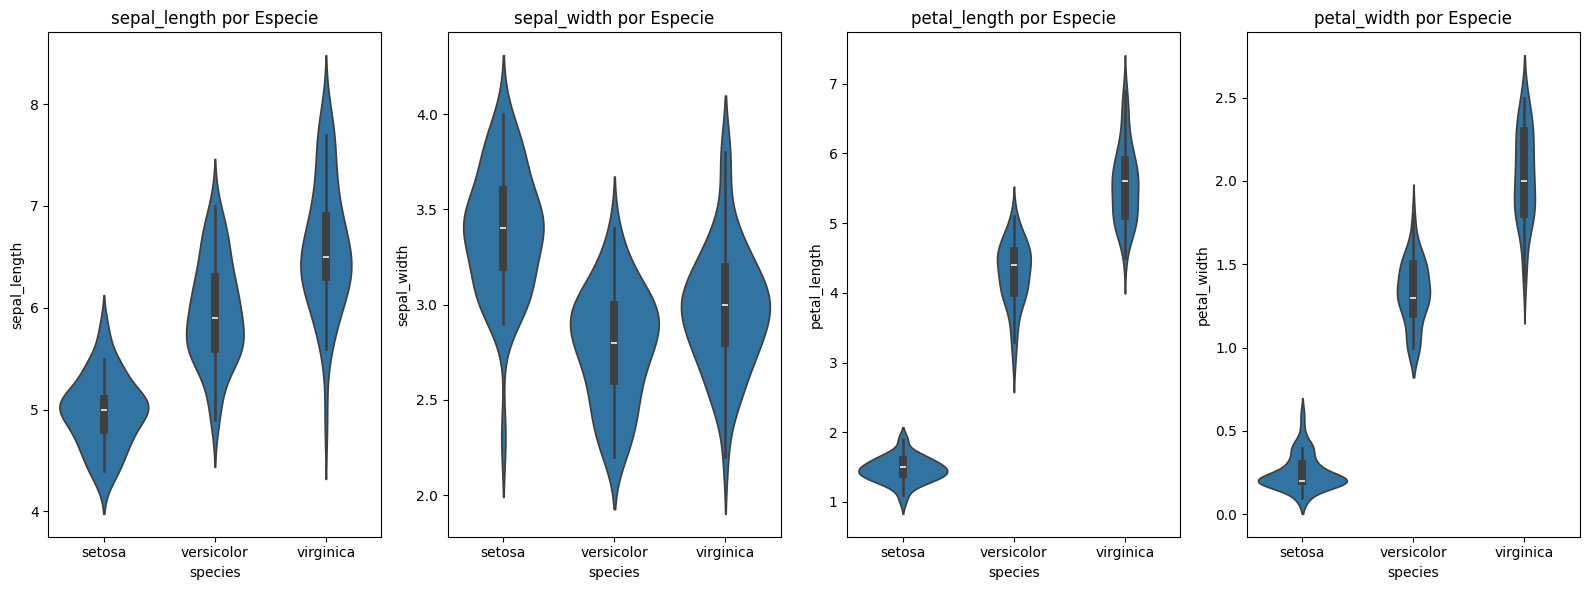

In [ ]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i + 1)
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f'{col} per specie')
plt.tight_layout()

##### Histogram of each species by petal length

Text(0.5, 1.03, 'Distribución de Longitud del Pétalo para Cada Especie')

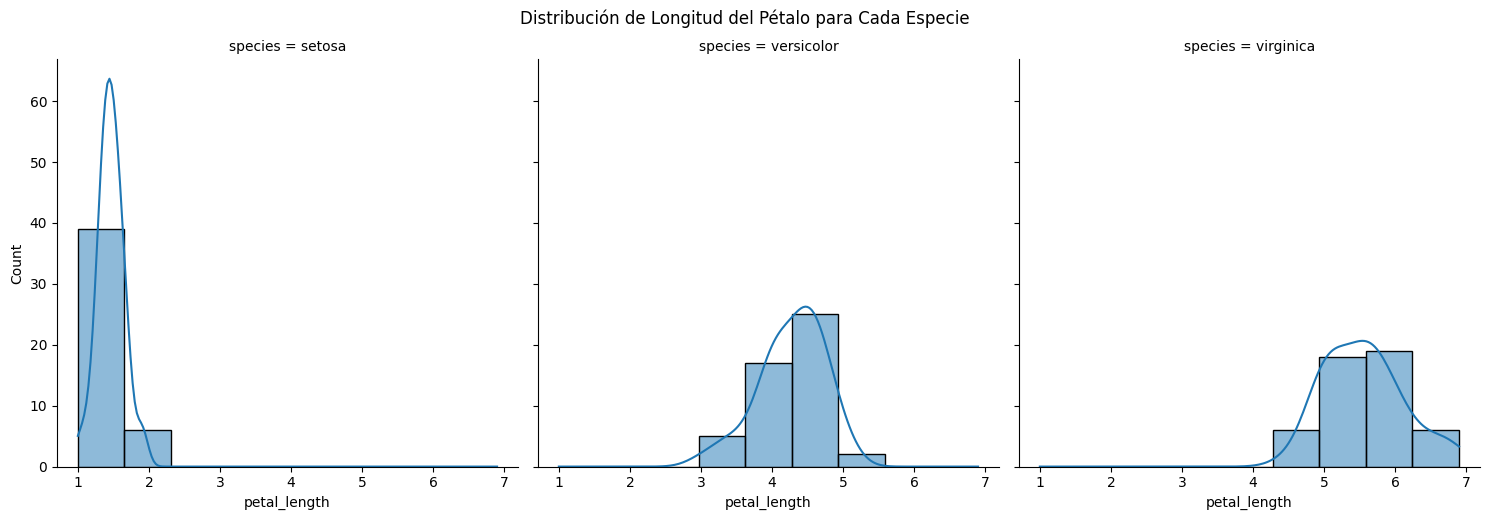

In [ ]:
g = sns.displot(df, x="petal_length", col="species", kind="hist", kde=True)
g.fig.suptitle('Histogram of each species by petal length', y=1.03)

##### Density by characteristics

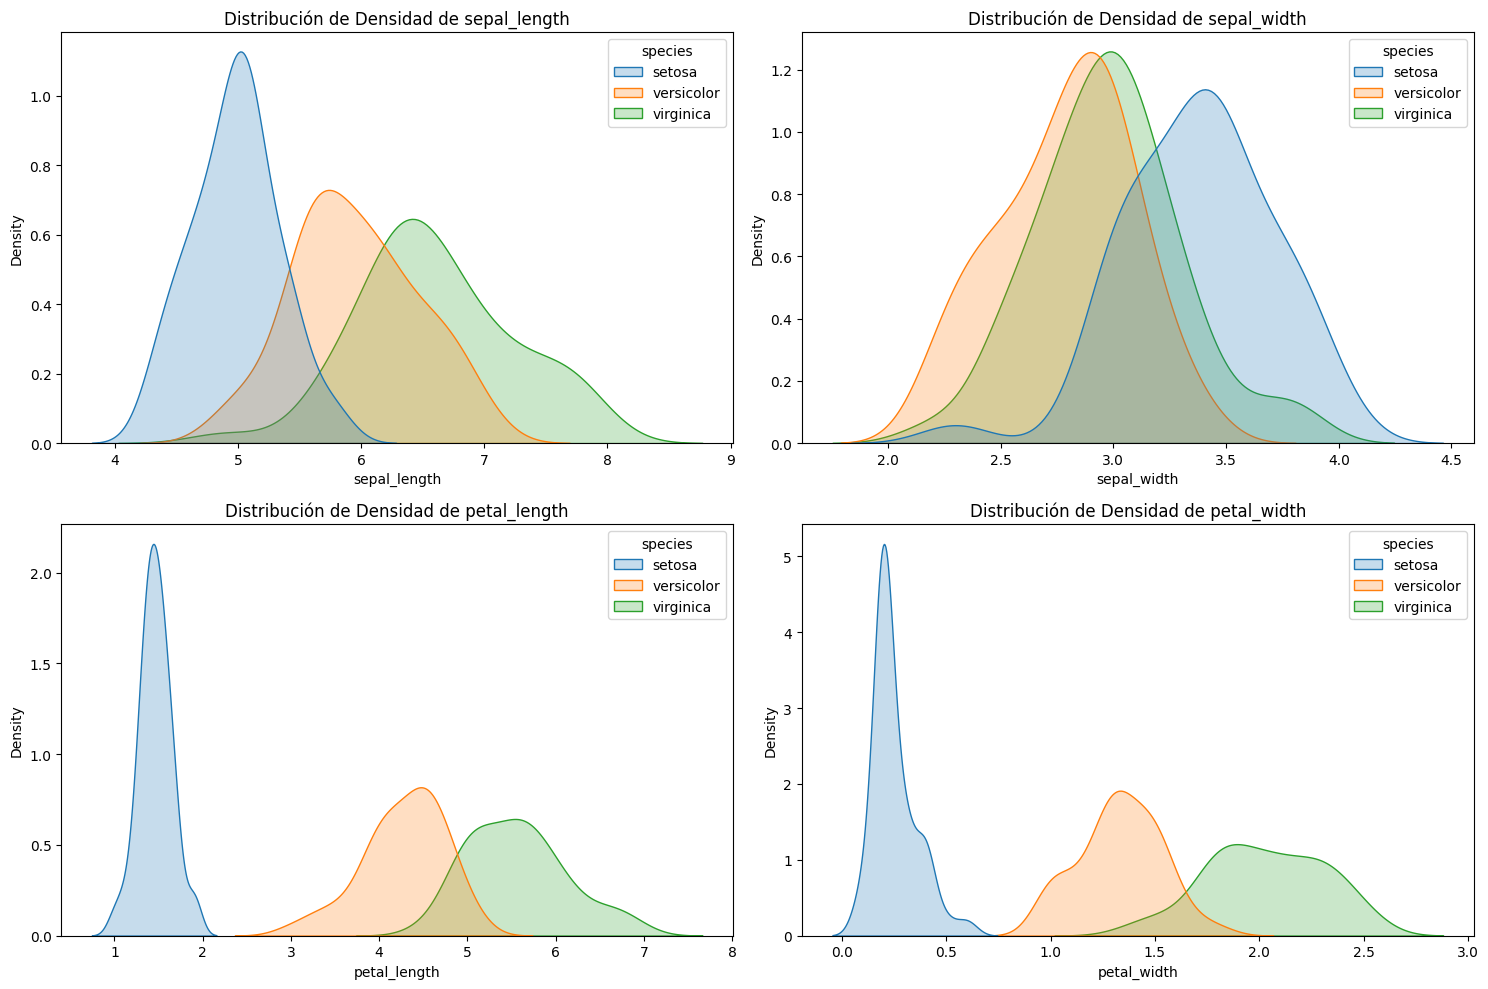

In [ ]:
plt.figure(figsize=(15, 10))
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df, x=col, hue='species', fill=True, common_norm=False)
    plt.title(f'Density by characteristics of {col}')
plt.tight_layout()

#### **Feature Engineering**

##### Create area and radius, separate the species, and merge everything into the dataset

In [ ]:
# Create Area Features
df['petal_area'] = df['petal_length'] * df['petal_width']
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

# Create Ratio Features
df['petal_ratio'] = df['petal_length'] / (df['petal_width'] + 1e-6)
df['sepal_ratio'] = df['sepal_length'] / (df['sepal_width'] + 1e-6)

species_dummies = pd.get_dummies(df['species'], prefix='species')

# We join the new encoded columns to our data frame
df = pd.concat([df, species_dummies], axis=1)

##### Make True = 1, and False = 0

In [ ]:
df.replace({False:0, True:1}, inplace=True)
df.head()

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_6212\2602916066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False:0, True:1}, inplace=True)


,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,petal_ratio,sepal_ratio,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85,6.999965,1.457142,1,0,0
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70,6.999965,1.633333,1,0,0
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04,6.499968,1.468750,1,0,0
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26,7.499963,1.483870,1,0,0
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00,6.999965,1.388889,1,0,0


In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,petal_ratio,sepal_ratio,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85,6.999965,1.457142,1,0,0
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70,6.999965,1.633333,1,0,0
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04,6.499968,1.468750,1,0,0
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26,7.499963,1.483870,1,0,0
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00,6.999965,1.388889,1,0,0


##### Return the species by number, setosa = 0, versicolor = 1, virginica = 2

In [25]:
df.loc[df["species"] == "setosa", "species"] = 0
df.loc[df["species"] == "versicolor", "species"] = 1
df.loc[df["species"] == "virginica", "species"] = 2
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,petal_ratio,sepal_ratio,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0.28,17.85,6.999965,1.457142,1,0,0
1,4.9,3.0,1.4,0.2,0,0.28,14.70,6.999965,1.633333,1,0,0
2,4.7,3.2,1.3,0.2,0,0.26,15.04,6.499968,1.468750,1,0,0
3,4.6,3.1,1.5,0.2,0,0.30,14.26,7.499963,1.483870,1,0,0
4,5.0,3.6,1.4,0.2,0,0.28,18.00,6.999965,1.388889,1,0,0


#### **Decision Tree model implementation without hyperparameter tuning**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Split Dataset

In [27]:
X = df.drop("species", axis=1)
y = df["species"]
y = y.astype(int)
#y.head()
X.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area,petal_ratio,sepal_ratio,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0.28,17.85,6.999965,1.457142,1,0,0
1,4.9,3.0,1.4,0.2,0.28,14.70,6.999965,1.633333,1,0,0
2,4.7,3.2,1.3,0.2,0.26,15.04,6.499968,1.468750,1,0,0
3,4.6,3.1,1.5,0.2,0.30,14.26,7.499963,1.483870,1,0,0
4,5.0,3.6,1.4,0.2,0.28,18.00,6.999965,1.388889,1,0,0


##### Split the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Train the decision tree

In [ ]:
X_train.shape

(100, 11)

In [30]:
X_train.shape

(100, 11)

In [31]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### Evaluate the model with training data

In [ ]:
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

<Axes: >

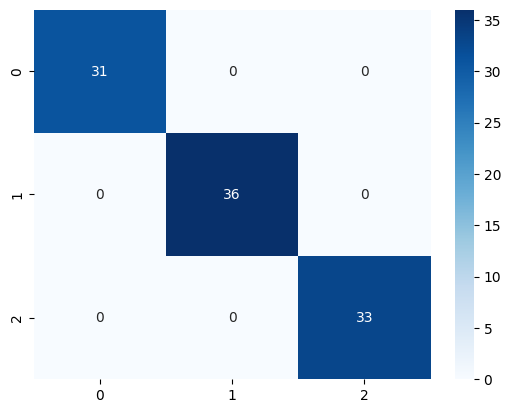

In [33]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap="Blues")

##### Evaluate model with test data

In [ ]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

1.0

<Axes: >

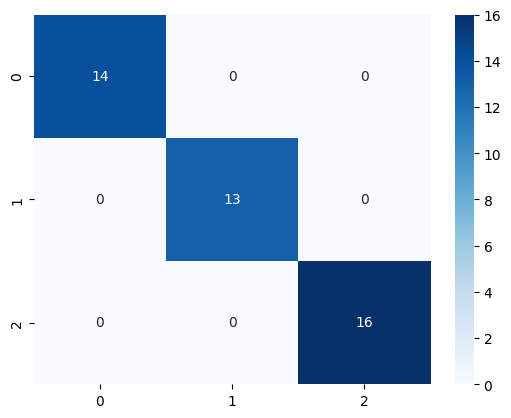

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap="Blues")

#### **Decision Tree model implementation with hyperparameter tuning**

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "criterion" : ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

In [37]:
y_pred_hyper = best_tree.predict(X_train)

In [38]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
accuracy_score(y_train, y_pred_hyper)

1.0

<Axes: >

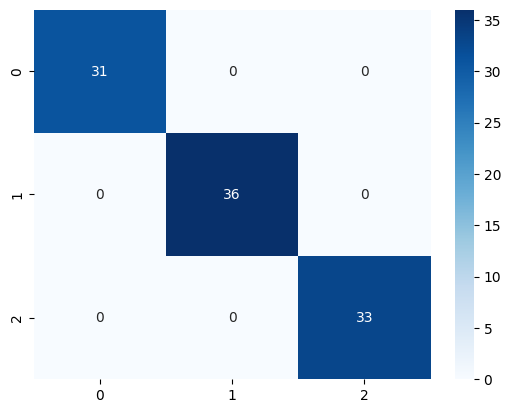

In [40]:
sns.heatmap(confusion_matrix(y_train, y_pred_hyper), annot=True, cmap="Blues")

In [41]:
y_pred_hyper_test = best_tree.predict(X_test)
accuracy_score(y_test, y_pred_hyper_test)

1.0

<Axes: >

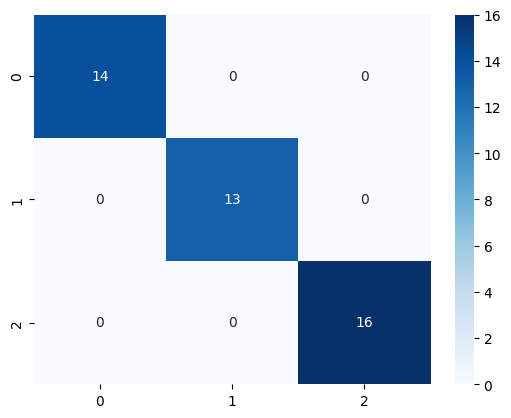

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_hyper_test), annot=True, cmap="Blues")

#### **Feature Importance**

In [43]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by= "Importance", ascending= False)
importance_df

,Feature,Importance
9,species_versicolor,0.519556
4,petal_area,0.480444
0,sepal_length,0.000000
2,petal_length,0.000000
1,sepal_width,0.000000
5,sepal_area,0.000000
3,petal_width,0.000000
6,petal_ratio,0.000000
7,sepal_ratio,0.000000
8,species_setosa,0.000000


<BarContainer object of 11 artists>

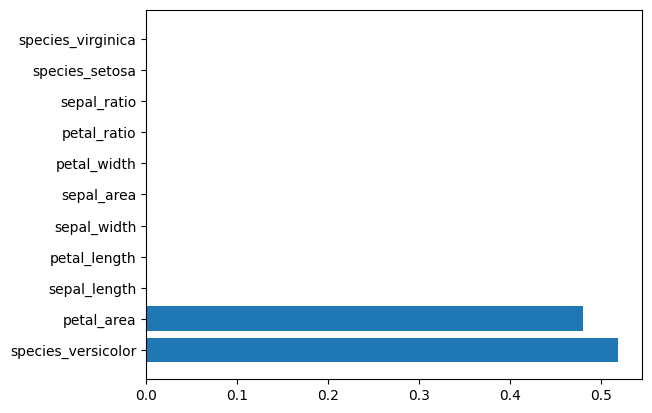

In [44]:
plt.barh(importance_df["Feature"], importance_df["Importance"])

In [45]:
X = df[["petal_area", "species_versicolor"]]
y = df["species"]
y = y.astype(int)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 3, 4, 5, 10, 12, 14],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "criterion" : ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

In [48]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
y_pred_fe = best_tree.predict(X_train)
accuracy_score(y_train, y_pred_fe)

1.0

<Axes: >

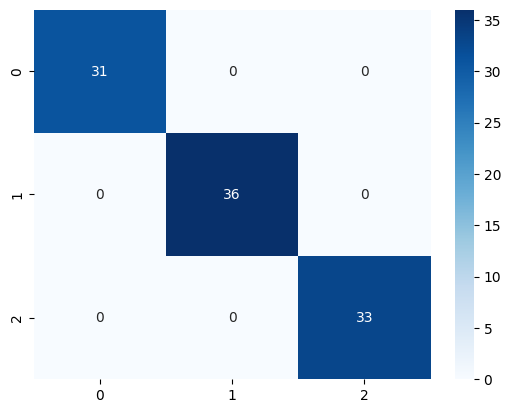

In [50]:
sns.heatmap(confusion_matrix(y_train, y_pred_fe), annot=True, cmap="Blues")

In [51]:
y_pred_fe_test = best_tree.predict(X_test)
accuracy_score(y_test, y_pred_fe_test)

1.0

<Axes: >

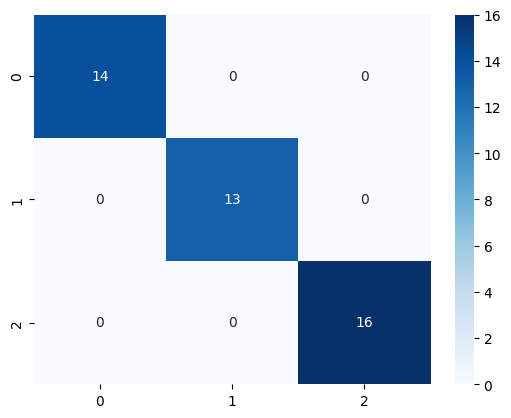

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred_fe_test), annot=True, cmap="Blues")